In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

(-0.5, 27.5, 27.5, -0.5)

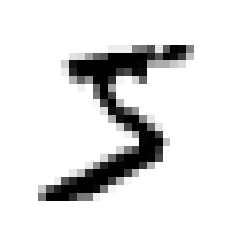

In [4]:
#display
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=plt.cm.binary,interpolation="nearest")
plt.axis("off")

In [5]:
# ahora vemos target
y[0]                 

'5'

In [6]:
# ojo label is string, lo convertimos a numero
y = y.astype(np.uint8)

In [7]:
# el dataset ya esta shuffle, por lo que aqui no hace falta
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]


In [8]:
# training a binary clasifier (si-no,1-0)
y_train_5 = (y_train==5) # true for all 5s, and false for the other digits
y_test_5 = (y_test==5)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [10]:
# ahora podemos predecir
sgd_clf.predict([some_digit])

array([ True])

### Performance Measures
Measuring Accuracy Using Cross-Validation

In [11]:
# hacemos un cros val score manual
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_df = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]

    clone_df.fit(X_train_folds,y_train_folds)
    y_pred = clone_df.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print( n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [12]:
# ahora con con sklearn
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others)

### confu‐sion matrix. 
A much better way to evaluate the performance of a classifier is to look at the confu‐
sion matrix. 

To compute the confusion matrix, you first need to have a set of predictions, so they
can be compared to the actual targets. You could make predictions on the test set, but
let’s keep it untouched for now (remember that you want to use the test set only at the
very end of your project, once you have a classifier that you are ready to launch).
Instead, you can use the cross_val_predict() function:

Just like the cross_val_score() function, cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predic‐
tions made on each test fold. This means that you get a clean prediction for each
instance in the training set (“clean” meaning that the prediction is made by a model
that never saw the data during training).



In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

Text(33.0, 0.5, 'actual')

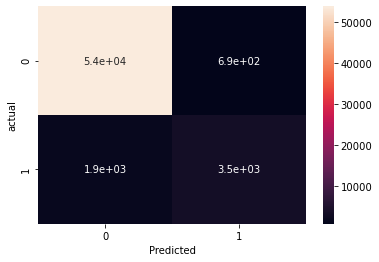

In [14]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_train_5,y_train_pred)
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("actual")

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1 score is
the harmonic mean of precision and recall 

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

Now how do you decide which threshold to use? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions

In [16]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

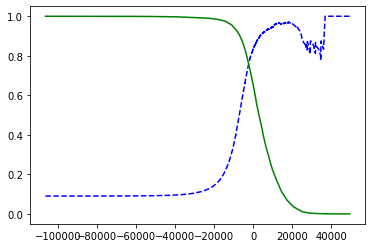

In [17]:
from sklearn.metrics import precision_recall_curve
precision, recall, treshold = precision_recall_curve(y_train_5,y_scores)
#plot
def plot_precision_recall_vs_treshold(precision, recall, treshold):
    plt.plot(treshold, precision[:-1], "b--", label="Precision")
    plt.plot(treshold, recall[:-1], "g-", label="Recall")
    [...] ## highlight the threshold, add the legend, axis label and grid

plot_precision_recall_vs_treshold(precision, recall, treshold)

Text(0, 0.5, 'precision')

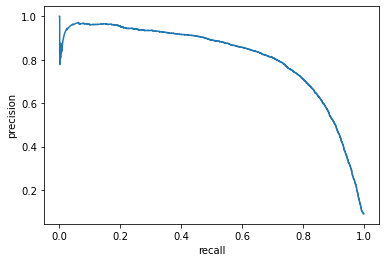

In [18]:
#Another way to select a good precision/recall tradeoff is to plot precision directly
#against recall,
plt.plot(recall,precision)
plt.xlabel("recall")
plt.ylabel("precision")

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright corner).

Hopefully you now know how to train binary classifiers, choose the appropriate met‐
ric for your task, evaluate your classifiers using cross-validation, select the precision/
recall tradeoff that fits your needs, and compare various models using ROC curves
and ROC AUC scores. 

### Multiclass Classification

pendiente ¡

### Ejercicios

In [19]:
#Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
#on the test set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
kn_clf = KNeighborsClassifier(weights="distance",n_neighbors=4)
# standarscaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [24]:
# fit model
kn_clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [25]:
y_predict = kn_clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9714